In [ ]:
%pip install --quiet --upgrade diffusers transformers accelerate invisible_watermark mediapy omegaconf
!pip install omegaconf
use_refiner = False

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.7/43.7 kB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.0/117.0 kB 5.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 21.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.5/9.5 MB 69.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 315.1/315.1 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 48.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 64.8 MB/s eta 0:00:00


In [ ]:
import mediapy as media
import random
import sys
import torch

from diffusers import DiffusionPipeline

model = "digiplay/Realisian_v5" # @param ["digiplay/Realisian_v5", "stabilityai/stable-diffusion-xl-base-1.0", "hakurei/waifu-diffusion", "Linaqruf/anything-v3.0"]

pipe = DiffusionPipeline.from_pretrained(
    model,
    torch_dtype=torch.float16,
    safety_checker=None,
    requires_safety_checker=False
)

pipe = pipe.to("cuda")

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/584 [00:00<?, ?B/s]

Fetching 13 files:   0%|          | 0/13 [00:00<?, ?it/s]

(…)ature_extractor/preprocessor_config.json:   0%|          | 0.00/520 [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/737 [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/507 [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/1.69k [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/582 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/transformers/models/clip/feature_extraction_clip.py:28: FutureWarning: The class CLIPFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use CLIPImageProcessor instead.
  warnings.warn(


  0%|          | 0/50 [00:00<?, ?it/s]

Prompt:	cat with wings
Seed:	3442633626


""

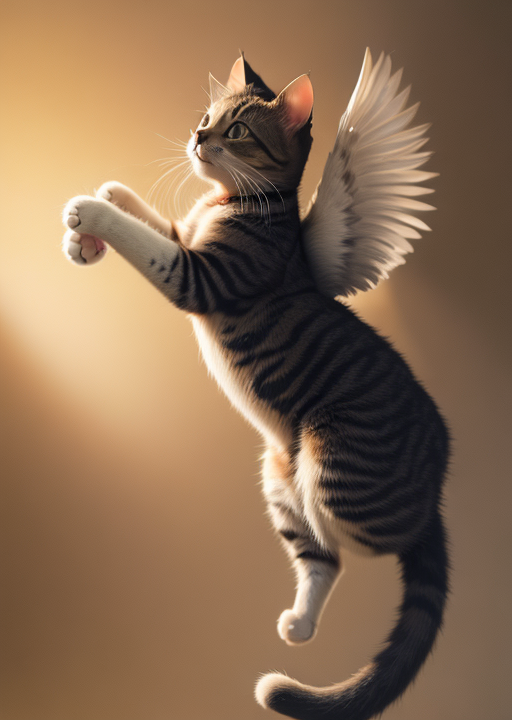

In [ ]:
import os
prompt = "cat with wings" #@param {type:"string"}
seed = 3442633626 # @param {type:"slider", min:0, max:9000000000, step:1}
negative_prompt = "bad-picture-chill-75v, ng_deepnegative_v1_75t, badhandv4, (worst quality:2), (low quality:2), (normal quality:2), (lowres:2), (bad anatomy:2), (bad hands:2), (watermark:2), (mole:1.5), (freckles:1.5)" #@param {type:"string"}
width = 512  #@param {type:"slider", min:8, max:2048, step:8}
height = 720  #@param {type:"slider", min:8, max:2048, step:8}
width = int(width)
height = int(height)
images = pipe(
    prompt=prompt,
    width=width,
    height=height,
    negative_prompt=negative_prompt,
    output_type="latent" if use_refiner else "pil",
    generator=torch.Generator().manual_seed(seed)
).images

if use_refiner:
  images = refiner(
      prompt = prompt,
      negative_prompt = negative_prompt,
      image = images,
      ).images
print(f"Prompt:\t{prompt}\nSeed:\t{seed}")

base_filename = "output.jpg"
new_filename = base_filename

if os.path.exists(base_filename):
    index = 1
    while True:
        new_filename = f"output_{index}.jpg"
        if not os.path.exists(new_filename):
            break
        index += 1

images[0].save(new_filename)

media.show_images(images)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')